In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Load Data

In [3]:
df = pd.read_csv('C:/Users/Tasnim/Desktop/dataUsed2/data_after_eda.csv', index_col=0)


In [4]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1       544             0                0  2010-04-16  2016-04-16   
2      1584             0                0  2010-03-30  2016-03-30   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p1_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.131756   
1      2010-04-16   2015-04-17              47.96  ...              0.167798   
2      2010-03-30   2015-03-31             240.04  ...              0.148586   

   mean_3m_price_p2_var  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
0              0.092638              0.036909             42.497907   
1              0.088409              0.000000             44.444710   
2              0.000000              0.000000             44.444710   

   mean_3m_price_p2_fix  mean_3m_price_p3_fix mean_3m_price_p1  \
0             12.218665              8.145777        42.629663   
1              0.000000              0.000000        44.612508   
2              0.000000              0.000000        44.593296   

   mean_3m_price_p2  mean_3m_price_p3  churn  
0         12.311304          8.182687      1  
1          0.088409          0.000000      0  
2          0.000000          0.000000      0  

[3 rows x 53 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10830 entries, 0 to 10829
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10830 non-null  object 
 1   channel_sales                   10830 non-null  object 
 2   cons_12m                        10830 non-null  int64  
 3   cons_gas_12m                    10830 non-null  int64  
 4   cons_last_month                 10830 non-null  int64  
 5   date_activ                      10830 non-null  object 
 6   date_end                        10830 non-null  object 
 7   date_modif_prod                 10830 non-null  object 
 8   date_renewal                    10830 non-null  object 
 9   forecast_cons_12m               10830 non-null  float64
 10  forecast_cons_year              10830 non-null  int64  
 11  forecast_discount_energy        10830 non-null  float64
 12  forecast_meter_rent_12m         10830

In [6]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [7]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1       544             0                0 2010-04-16 2016-04-16   
2      1584             0                0 2010-03-30 2016-03-30   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p1_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.131756   
1      2010-04-16   2015-04-17              47.96  ...              0.167798   
2      2010-03-30   2015-03-31             240.04  ...              0.148586   

   mean_3m_price_p2_var  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
0              0.092638              0.036909             42.497907   
1              0.088409              0.000000             44.444710   
2              0.000000              0.000000             44.444710   

   mean_3m_price_p2_fix  mean_3m_price_p3_fix mean_3m_price_p1  \
0             12.218665              8.145777        42.629663   
1              0.000000              0.000000        44.612508   
2              0.000000              0.000000        44.593296   

   mean_3m_price_p2  mean_3m_price_p3  churn  
0         12.311304          8.182687      1  
1          0.088409          0.000000      0  
2          0.000000          0.000000      0  

[3 rows x 53 columns]

# Feature engineering 

### Difference between off-peak prices in December and preceding January

In [8]:
price_df = pd.read_csv('C:/Users/Tasnim/Desktop/dataUsed2//price_data.csv')

In [9]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [10]:
price_df

id price_date  price_off_peak_var  \
0       038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1       038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2       038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3       038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4       038af19179925da21a25619c5a24b745 2015-05-01            0.149626   
...                                  ...        ...                 ...   
192997  16f51cdc2baa19af0b940ee1b3dd17d5 2015-08-01            0.119916   
192998  16f51cdc2baa19af0b940ee1b3dd17d5 2015-09-01            0.119916   
192999  16f51cdc2baa19af0b940ee1b3dd17d5 2015-10-01            0.119916   
193000  16f51cdc2baa19af0b940ee1b3dd17d5 2015-11-01            0.119916   
193001  16f51cdc2baa19af0b940ee1b3dd17d5 2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0             0.000000            0.000000           44.266931   
1             0.000000            0.000000           44.266931   
2             0.000000            0.000000           44.266931   
3             0.000000            0.000000           44.266931   
4             0.000000            0.000000           44.266931   
...                ...                 ...                 ...   
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  
0              0.00000            0.000000  
1              0.00000            0.000000  
2              0.00000            0.000000  
3              0.00000            0.000000  
4              0.00000            0.000000  
...                ...                 ...  
192997        24.43733           16.291555  
192998        24.43733           16.291555  
192999        24.43733           16.291555  
193000        24.43733           16.291555  
193001        24.43733           16.291555  

[193002 rows x 8 columns]

In [11]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

In [12]:
monthly_price_by_id

id price_date  price_off_peak_var  \
0       0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1       0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2       0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3       0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4       0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   
...                                  ...        ...                 ...   
192997  ffff7fa066f1fb305ae285bb03bf325a 2015-08-01            0.119916   
192998  ffff7fa066f1fb305ae285bb03bf325a 2015-09-01            0.119916   
192999  ffff7fa066f1fb305ae285bb03bf325a 2015-10-01            0.119916   
193000  ffff7fa066f1fb305ae285bb03bf325a 2015-11-01            0.119916   
193001  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

        price_off_peak_fix  
0                40.565969  
1                40.565969  
2                40.728885  
3                40.728885  
4                40.728885  
...                    ...  
192997           40.728885  
192998           40.728885  
192999           40.728885  
193000           40.728885  
193001           40.728885  

[193002 rows x 4 columns]

In [13]:
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

In [14]:
jan_prices 

id price_date  price_off_peak_var  \
0      0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1      0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
2      0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01            0.150837   
3      0010ee3855fdea87602a5b7aba8e42de 2015-01-01            0.123086   
4      00114d74e963e47177db89bc70108537 2015-01-01            0.149434   
...                                 ...        ...                 ...   
16091  ffef185810e44254c3a4c6395e6b4d8a 2015-01-01            0.162720   
16092  fffac626da707b1b5ab11e8431a4d0a2 2015-01-01            0.148825   
16093  fffc0cacd305dd51f316424bbb08d1bd 2015-01-01            0.153159   
16094  fffe4f5646aa39c7f97f95ae2679ce64 2015-01-01            0.127566   
16095  ffff7fa066f1fb305ae285bb03bf325a 2015-01-01            0.129444   

       price_off_peak_fix  
0               40.565969  
1               44.266931  
2               44.444710  
3               40.565969  
4               44.266931  
...                   ...  
16091           41.063970  
16092           44.266931  
16093           41.063970  
16094           40.565969  
16095           40.565969  

[16096 rows x 4 columns]

In [15]:
dec_prices

id price_date  price_off_peak_var  \
0      0002203ffbb812588b632b9e628cc38d 2015-12-01            0.119906   
1      0004351ebdd665e6ee664792efc4fd13 2015-12-01            0.143943   
2      0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01            0.201280   
3      0010ee3855fdea87602a5b7aba8e42de 2015-12-01            0.113068   
4      00114d74e963e47177db89bc70108537 2015-12-01            0.145440   
...                                 ...        ...                 ...   
16091  ffef185810e44254c3a4c6395e6b4d8a 2015-12-01            0.112488   
16092  fffac626da707b1b5ab11e8431a4d0a2 2015-12-01            0.145047   
16093  fffc0cacd305dd51f316424bbb08d1bd 2015-12-01            0.151399   
16094  fffe4f5646aa39c7f97f95ae2679ce64 2015-12-01            0.118175   
16095  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

       price_off_peak_fix  
0               40.728885  
1               44.444710  
2               45.944710  
3               40.728885  
4               44.266930  
...                   ...  
16091           40.728885  
16092           44.444710  
16093           41.228885  
16094           40.728885  
16095           40.728885  

[16096 rows x 4 columns]

In [16]:
diff=pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')

In [17]:
diff

id price_date     dec_1      dec_2  \
0      0002203ffbb812588b632b9e628cc38d 2015-12-01  0.119906  40.728885   
1      0004351ebdd665e6ee664792efc4fd13 2015-12-01  0.143943  44.444710   
2      0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01  0.201280  45.944710   
3      0010ee3855fdea87602a5b7aba8e42de 2015-12-01  0.113068  40.728885   
4      00114d74e963e47177db89bc70108537 2015-12-01  0.145440  44.266930   
...                                 ...        ...       ...        ...   
16091  ffef185810e44254c3a4c6395e6b4d8a 2015-12-01  0.112488  40.728885   
16092  fffac626da707b1b5ab11e8431a4d0a2 2015-12-01  0.145047  44.444710   
16093  fffc0cacd305dd51f316424bbb08d1bd 2015-12-01  0.151399  41.228885   
16094  fffe4f5646aa39c7f97f95ae2679ce64 2015-12-01  0.118175  40.728885   
16095  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01  0.119916  40.728885   

       price_off_peak_var  price_off_peak_fix  
0                0.126098           40.565969  
1                0.148047           44.266931  
2                0.150837           44.444710  
3                0.123086           40.565969  
4                0.149434           44.266931  
...                   ...                 ...  
16091            0.162720           41.063970  
16092            0.148825           44.266931  
16093            0.153159           41.063970  
16094            0.127566           40.565969  
16095            0.129444           40.565969  

[16096 rows x 6 columns]

In [18]:
# Calculate the difference
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']

In [19]:
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head(2) 

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779

In [20]:
diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               16096 non-null  object 
 1   offpeak_diff_dec_january_energy  16096 non-null  float64
 2   offpeak_diff_dec_january_power   16096 non-null  float64
dtypes: float64(2), object(1)
memory usage: 377.4+ KB


In [21]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
4  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1       544             0                0 2010-04-16 2016-04-16   
2      1584             0                0 2010-03-30 2016-03-30   
3      8302             0             1998 2011-12-09 2016-12-09   
4     45097             0                0 2011-12-02 2016-12-02   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p3_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.036909   
1      2010-04-16   2015-04-17              47.96  ...              0.000000   
2      2010-03-30   2015-03-31             240.04  ...              0.000000   
3      2015-11-01   2015-12-10             796.94  ...              0.000000   
4      2011-12-02   2015-12-03            8069.28  ...              0.000000   

   mean_3m_price_p1_fix  mean_3m_price_p2_fix  mean_3m_price_p3_fix  \
0             42.497907             12.218665              8.145777   
1             44.444710              0.000000              0.000000   
2             44.444710              0.000000              0.000000   
3             44.266930              0.000000              0.000000   
4             44.266930              0.000000              0.000000   

   mean_3m_price_p1  mean_3m_price_p2 mean_3m_price_p3  churn  \
0         42.629663         12.311304         8.182687      1   
1         44.612508          0.088409         0.000000      0   
2         44.593296          0.000000         0.000000      0   
3         44.430589          0.084587         0.000000      1   
4         44.430291          0.084305         0.000000      1   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.004670                        0.177779  
2                        -0.004547                        0.177779  
3                        -0.008087                       -0.000001  
4                        -0.004628                        0.000000  

[5 rows x 55 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10830 entries, 0 to 10829
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               10830 non-null  object        
 1   channel_sales                    10830 non-null  object        
 2   cons_12m                         10830 non-null  int64         
 3   cons_gas_12m                     10830 non-null  int64         
 4   cons_last_month                  10830 non-null  int64         
 5   date_activ                       10830 non-null  datetime64[ns]
 6   date_end                         10830 non-null  datetime64[ns]
 7   date_modif_prod                  10830 non-null  datetime64[ns]
 8   date_renewal                     10830 non-null  datetime64[ns]
 9   forecast_cons_12m                10830 non-null  float64       
 10  forecast_cons_year               10830 non-null  int64    

## Average price changes across periods

In [23]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [24]:
mean_prices

id  price_off_peak_var  price_peak_var  \
0      0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1      0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2      0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3      0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4      00114d74e963e47177db89bc70108537            0.147926        0.000000   
...                                 ...                 ...             ...   
16091  ffef185810e44254c3a4c6395e6b4d8a            0.138863        0.115125   
16092  fffac626da707b1b5ab11e8431a4d0a2            0.147137        0.000000   
16093  fffc0cacd305dd51f316424bbb08d1bd            0.153879        0.129497   
16094  fffe4f5646aa39c7f97f95ae2679ce64            0.123858        0.103499   
16095  ffff7fa066f1fb305ae285bb03bf325a            0.125360        0.104895   

       price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0                0.073160           40.701732       24.421038   
1                0.000000           44.385450        0.000000   
2                0.000000           45.319710        0.000000   
3                0.069032           40.647427       24.388455   
4                0.000000           44.266930        0.000000   
...                   ...                 ...             ...   
16091            0.080780           40.896427       24.637456   
16092            0.000000           44.311375        0.000000   
16093            0.094842           41.160171       24.895768   
16094            0.073735           40.606699       24.364017   
16095            0.075635           40.647427       24.388455   

       price_mid_peak_fix  
0               16.280694  
1                0.000000  
2                0.000000  
3               16.258971  
4                0.000000  
...                   ...  
16091           16.507972  
16092            0.000000  
16093           16.763569  
16094           16.242678  
16095           16.258971  

[16096 rows x 7 columns]

In [25]:
#mean_prices.to_csv('C:/Users/Tasnim/Desktop/dataUsed2/AVERAGEpRICE.csv')

In [26]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [27]:
mean_prices

id  price_off_peak_var  price_peak_var  \
0      0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1      0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2      0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3      0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4      00114d74e963e47177db89bc70108537            0.147926        0.000000   
...                                 ...                 ...             ...   
16091  ffef185810e44254c3a4c6395e6b4d8a            0.138863        0.115125   
16092  fffac626da707b1b5ab11e8431a4d0a2            0.147137        0.000000   
16093  fffc0cacd305dd51f316424bbb08d1bd            0.153879        0.129497   
16094  fffe4f5646aa39c7f97f95ae2679ce64            0.123858        0.103499   
16095  ffff7fa066f1fb305ae285bb03bf325a            0.125360        0.104895   

       price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0                0.073160           40.701732       24.421038   
1                0.000000           44.385450        0.000000   
2                0.000000           45.319710        0.000000   
3                0.069032           40.647427       24.388455   
4                0.000000           44.266930        0.000000   
...                   ...                 ...             ...   
16091            0.080780           40.896427       24.637456   
16092            0.000000           44.311375        0.000000   
16093            0.094842           41.160171       24.895768   
16094            0.073735           40.606699       24.364017   
16095            0.075635           40.647427       24.388455   

       price_mid_peak_fix  off_peak_peak_var_mean_diff  \
0               16.280694                     0.020545   
1                0.000000                     0.146426   
2                0.000000                     0.181558   
3               16.258971                     0.020465   
4                0.000000                     0.147926   
...                   ...                          ...   
16091           16.507972                     0.023739   
16092            0.000000                     0.147137   
16093           16.763569                     0.024382   
16094           16.242678                     0.020359   
16095           16.258971                     0.020465   

       peak_mid_peak_var_mean_diff  off_peak_mid_peak_var_mean_diff  \
0                         0.030633                         0.051178   
1                         0.000000                         0.146426   
2                         0.000000                         0.181558   
3                         0.029260                         0.049725   
4                         0.000000                         0.147926   
...                            ...                              ...   
16091                     0.034344                         0.058083   
16092                     0.000000                         0.147137   
16093                     0.034655                         0.059037   
16094                     0.029764                         0.050123   
16095                     0.029260                         0.049725   

       off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                        16.280694                     8.140345   
1                        44.385450                     0.000000   
2                        45.319710                     0.000000   
3                        16.258972                     8.129484   
4                        44.266930                     0.000000   
...                            ...                          ...   
16091                    16.258971                     8.129484   
16092                    44.311375                     0.000000   
16093                    16.264402                     8.132199   
16094                    16.242682                     8.121339   
16095               

In [28]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')

In [29]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
4  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1       544             0                0 2010-04-16 2016-04-16   
2      1584             0                0 2010-03-30 2016-03-30   
3      8302             0             1998 2011-12-09 2016-12-09   
4     45097             0                0 2011-12-02 2016-12-02   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p3  \
0      2015-11-01   2015-06-23               0.00  ...          8.182687   
1      2010-04-16   2015-04-17              47.96  ...          0.000000   
2      2010-03-30   2015-03-31             240.04  ...          0.000000   
3      2015-11-01   2015-12-10             796.94  ...          0.000000   
4      2011-12-02   2015-12-03            8069.28  ...          0.000000   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      1                         0.020057                        3.700961   
1      0                        -0.004670                        0.177779   
2      0                        -0.004547                        0.177779   
3      1                        -0.008087                       -0.000001   
4      1                        -0.004628                        0.000000   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.082090                     0.088421   
2                     0.151210                     0.000000   
3                     0.081320                     0.087632   
4                     0.081316                     0.084744   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.170512                    44.385450   
2                        0.151210                    44.400265   
3                        0.168953                    44.266930   
4                        0.166061                    44.266930   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                      7.45067                        26.040925  
1                      0.00000                        44.385450  
2                      0.00000                        44.400265  
3                      0.00000                        44.266930  
4                      0.00000                        44.266930  

[5 rows x 61 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10830 entries, 0 to 10829
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               10830 non-null  object        
 1   channel_sales                    10830 non-null  object        
 2   cons_12m                         10830 non-null  int64         
 3   cons_gas_12m                     10830 non-null  int64         
 4   cons_last_month                  10830 non-null  int64         
 5   date_activ                       10830 non-null  datetime64[ns]
 6   date_end                         10830 non-null  datetime64[ns]
 7   date_modif_prod                  10830 non-null  datetime64[ns]
 8   date_renewal                     10830 non-null  datetime64[ns]
 9   forecast_cons_12m                10830 non-null  float64       
 10  forecast_cons_year               10830 non-null  int64    

## Max price changes across periods and months

In [31]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [32]:
mean_prices_by_month

id price_date  price_off_peak_var  \
0       0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1       0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2       0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3       0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4       0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   
...                                  ...        ...                 ...   
192997  ffff7fa066f1fb305ae285bb03bf325a 2015-08-01            0.119916   
192998  ffff7fa066f1fb305ae285bb03bf325a 2015-09-01            0.119916   
192999  ffff7fa066f1fb305ae285bb03bf325a 2015-10-01            0.119916   
193000  ffff7fa066f1fb305ae285bb03bf325a 2015-11-01            0.119916   
193001  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0             0.103975            0.070232           40.565969   
1             0.103975            0.070232           40.565969   
2             0.105842            0.073773           40.728885   
3             0.105842            0.073773           40.728885   
4             0.105842            0.073773           40.728885   
...                ...                 ...                 ...   
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  
0            24.339581           16.226389  
1            24.339581           16.226389  
2            24.437330           16.291555  
3            24.437330           16.291555  
4            24.437330           16.291555  
...                ...                 ...  
192997       24.437330           16.291555  
192998       24.437330           16.291555  
192999       24.437330           16.291555  
193000       24.437330           16.291555  
193001       24.437330           16.291555  

[193002 rows x 8 columns]

In [33]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [34]:
mean_prices_by_month

id price_date  price_off_peak_var  \
0       0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1       0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2       0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3       0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4       0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   
...                                  ...        ...                 ...   
192997  ffff7fa066f1fb305ae285bb03bf325a 2015-08-01            0.119916   
192998  ffff7fa066f1fb305ae285bb03bf325a 2015-09-01            0.119916   
192999  ffff7fa066f1fb305ae285bb03bf325a 2015-10-01            0.119916   
193000  ffff7fa066f1fb305ae285bb03bf325a 2015-11-01            0.119916   
193001  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0             0.103975            0.070232           40.565969   
1             0.103975            0.070232           40.565969   
2             0.105842            0.073773           40.728885   
3             0.105842            0.073773           40.728885   
4             0.105842            0.073773           40.728885   
...                ...                 ...                 ...   
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  off_peak_peak_var_mean_diff  \
0            24.339581           16.226389                     0.022123   
1            24.339581           16.226389                     0.022123   
2            24.437330           16.291555                     0.022225   
3            24.437330           16.291555                     0.022225   
4            24.437330           16.291555                     0.022225   
...                ...                 ...                          ...   
192997       24.437330           16.291555                     0.017684   
192998       24.437330           16.291555                     0.017684   
192999       24.437330           16.291555                     0.017684   
193000       24.437330           16.291555                     0.017684   
193001       24.437330           16.291555                     0.017684   

        peak_mid_peak_var_mean_diff  off_peak_mid_peak_var_mean_diff  \
0                          0.033743                         0.055866   
1                          0.033743                         0.055866   
2                          0.032069                         0.054294   
3                          0.032069                         0.054294   
4                          0.032069                         0.054294   
...                             ...                              ...   
192997                     0.025975                         0.043659   
192998                     0.025975                         0.043659   
192999                     0.025975                         0.043659   
193000                     0.025975                         0.043659   
193001                     0.025975                         0.043659   

        off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                         16.226389                     8.113192   
1                         16.226389                     8.113192   
2                         16.291555                     8.145775   
3                         16.291555                     8.145775   
4                         16.291555                     8.145775   
...                             ...                          ...   
192997                    16.291555                     8.145775   
192998                    16.29155

In [35]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [36]:
max_diff_across_periods_months

id  off_peak_peak_var_max_monthly_diff  \
0      0002203ffbb812588b632b9e628cc38d                            0.022225   
1      0004351ebdd665e6ee664792efc4fd13                            0.148405   
2      0010bcc39e42b3c2131ed2ce55246e3c                            0.205742   
3      0010ee3855fdea87602a5b7aba8e42de                            0.022581   
4      00114d74e963e47177db89bc70108537                            0.149902   
...                                 ...                                 ...   
16091  ffef185810e44254c3a4c6395e6b4d8a                            0.029128   
16092  fffac626da707b1b5ab11e8431a4d0a2                            0.148825   
16093  fffc0cacd305dd51f316424bbb08d1bd                            0.028520   
16094  fffe4f5646aa39c7f97f95ae2679ce64                            0.022138   
16095  ffff7fa066f1fb305ae285bb03bf325a                            0.022581   

       peak_mid_peak_var_max_monthly_diff  \
0                                0.033743   
1                                0.000000   
2                                0.000000   
3                                0.031859   
4                                0.000000   
...                                   ...   
16091                            0.042028   
16092                            0.000000   
16093                            0.039592   
16094                            0.031941   
16095                            0.031859   

       off_peak_mid_peak_var_max_monthly_diff  \
0                                    0.055866   
1                                    0.148405   
2                                    0.205742   
3                                    0.054440   
4                                    0.149902   
...                                       ...   
16091                                0.071156   
16092                                0.148825   
16093                                0.068112   
16094                                0.054079   
16095                                0.054440   

       off_peak_peak_fix_max_monthly_diff  peak_mid_peak_fix_max_monthly_diff  \
0                               16.291555                            8.145775   
1                               44.444710                            0.000000   
2                               45.944710                            0.000000   
3                               16.291555                            8.145775   
4                               44.266931                            0.000000   
...                                   ...                                 ...   
16091                           16.291555                            8.145775   
16092                           44.444710                            0.000000   
16093                           16.291555                            8.145775   
16094                           16.291555                            8.145775   
16095                           16.291555                            8.145775   

       off_peak_mid_peak_fix_max_monthly_diff  
0                                   24.437330  
1                                   44.444710  
2                                   45.944710  
3                                   24.437330  
4                                   44.266931  
...                                       ...  
16091                               24.437330  
16092                               44.444710  
16093                               24.437330  
16094                               24.437330  
16095                               24.437330  

[16096 rows x 7 columns]

In [37]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
4  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1       544             0                0 2010-04-16 2016-04-16   
2      1584             0                0 2010-03-30 2016-03-30   
3      8302             0             1998 2011-12-09 2016-12-09   
4     45097             0                0 2011-12-02 2016-12-02   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2010-04-16   2015-04-17              47.96  ...   
2      2010-03-30   2015-03-31             240.04  ...   
3      2015-11-01   2015-12-10             796.94  ...   
4      2011-12-02   2015-12-03            8069.28  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.170512                    44.385450   
2                         0.151210                    44.400265   
3                         0.168953                    44.266930   
4                         0.166061                    44.266930   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                      7.45067                        26.040925   
1                      0.00000                        44.385450   
2                      0.00000                        44.400265   
3                      0.00000                        44.266930   
4                      0.00000                        44.266930   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.084587                            0.089162   
2                            0.153133                            0.000000   
3                            0.082931                            0.088815   
4                            0.082931                            0.085058   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.146033                           44.266930   
1                               0.172468                           44.444710   
2                               0.153133                           44.444710   
3                               0.171746                           44.266931   
4                               0.167989                           44.266930   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                               44.266930  
1                            0.000000                               44.444710  
2                            0.000000                               44.444710  
3                            0.000000                               44.266931  
4                            0.000000                               44.266930  

[5 rows x 67 columns]

Calculating maximum price changes across different time periods and months helps identify significant fluctuations in prices
Sudden and substantial price changes can influence customers to consider switching to other utility providers,
making it a valuable feature for predicting customer churn.

### Tenure

How long a company has been a client of PowerCo.

In [38]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [39]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
2       0.176471
3       0.146302
4       0.127268
5       0.096347
8       0.076923
6       0.073129
7       0.067628
9       0.000000
10      0.000000
11      0.000000

We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer.

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

## Transforming DATA

### Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [40]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [41]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

Dates in their raw datetime format aren't directly suitable for predictive modeling. We need to transform these dates into more informative features with potential predictive power.

Consider the following scenarios: 

1. **Months of Activity (`months_activ`):** Longer-term clients may exhibit higher brand loyalty, suggesting they are less likely to churn. Conversely, newer clients might be more volatile. The `months_activ` feature captures the duration of a client's engagement with PowerCo.

2. **Months Until Contract Ends (`months_to_end`):** Clients nearing the end of their contracts might explore new options, while those who recently joined could still be within a grace period to leave. Additionally, mid-contract termination might incur charges. `months_to_end` helps us understand churn timing patterns.

3. **Months Since Last Contract Update (`months_modif_prod`):** Clients who recently modified their contracts may be more engaged or have received customer service attention. This could indicate a positive sign of customer engagement.

4. **Months Since Last Renewal (`months_renewal`):** The duration since a client last renewed their contract reveals both engagement and commitment levels. Clients who renew their contracts may exhibit higher loyalty.

These engineered features provide insights into client behavior and engagement, helping us better understand and predict churn patterns.


In [42]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
4  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1       544             0                0              47.96   
2      1584             0                0             240.04   
3      8302             0             1998             796.94   
4     45097             0                0            8069.28   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    38.72   
2                   0                       0.0                    19.83   
3                1998                       0.0                    30.12   
4                   0                       0.0                     0.00   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.085483   
1                        0.165794  ...                            0.089162   
2                        0.146694  ...                            0.000000   
3                        0.164775  ...                            0.088815   
4                        0.166178  ...                            0.085058   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.172468                          44.444710   
2                                0.153133                          44.444710   
3                                0.171746                          44.266931   
4                                0.167989                          44.266930   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                               44.266930   
1                            0.000000                               44.444710   
2                            0.000000                               44.444710   
3                            0.000000                               44.266931   
4                            0.000000                               44.266930   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30              5                  1              6  
1       6            67              3                 67              8  
2       6            67              2                 67              8  
3       5            47             11                  1              0  
4       5            48             10                 48              0  

[5 rows x 68 columns]

### Transforming Boolean data

#### has_gas

We simply want to transform this column from being categorical to being a binary flag

In [43]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.107881
1        0.088594

Having both electricity and gas services with PowerCo indicates that a customer uses multiple products and exhibits loyalty to the brand.
Consequently, it's not unexpected to observe that customers who exclusively purchase electricity (without gas) are nearly 2% more likely to churn compared to those who also include gas in their services. 
This feature holds significance for churn prediction.

### Transforming categorical data
In predictive modeling, categorical or string values cannot be directly processed. As a data scientist, my task is to transform these categorical features into numerical representations that are both concise and discriminative.

The most straightforward approach involves assigning each category a unique integer (label encoding). However, this may introduce an unintended ordinal relationship among categori s (e.g., 0 < 1 < 2 <  3), which is not always appropriate.

AlternativeI you can employ dummy variables, also known as one-hot encoding, to encode categorical features. This method creates a new binary feature for each distinct value in a categorical column. These binary features indicate whether a company belongs to a particular category (1) or not (0).


#### channel_sales

In [44]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6721
lmkebamcaaclubfxadlmueccxoimlema    1836
usilxuppasemubllopkaafesmlibmsdf    1369
ewpakwlliwisiwduibdlfmalxowmwpci     888
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

We have a total of 8 categories in this column, and we intend to create 8 dummy variables based on these categories. Nevertheless, examining the output, it's evident that the last 3 categories have very limited occurrences, specifically 11, 3, and 2 occurrences. Given the substantial size of our dataset, comprising approximately 10830 rows, these dummy variables would predominantly consist of 0 values. Consequently, they would contribute minimal predictive power to the model, as they essentially act as constants with very limited variation.

Hence, we have decided to exclude these 3 sparse dummy variables from our analysis.

In [45]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  764c75f661154dac3a6c254cd082ea7d       544             0                0   
2  bba03439a292a1e166f80264c16191cb      1584             0                0   
3  1aa498825382410b098937d65c4ec26d      8302             0             1998   
4  7ab4bf4878d8f7661dfc20e9b8e18011     45097             0                0   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1              47.96                   0                       0.0   
2             240.04                   0                       0.0   
3             796.94                1998                       0.0   
4            8069.28                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    38.72                        0.165794   
2                    19.83                        0.146694   
3                    30.12                        0.164775   
4                     0.00                        0.166178   

   forecast_price_energy_peak  ...  off_peak_mid_peak_fix_max_monthly_diff  \
0                    0.098142  ...                               44.266930   
1                    0.087899  ...                               44.444710   
2                    0.000000  ...                               44.444710   
3                    0.086131  ...                               44.266931   
4                    0.087538  ...                               44.266930   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  \
0       3            30              5                  1               6   
1       6            67              3                 67               8   
2       6            67              2                 67               8   
3       5            47             11                  1               0   
4       5            48             10                 48               0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                     False   
3                                     False   
4                                      True   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                     True   
3                                    False   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                      True  
4                                     False  

[5 rows x 71 columns]

In [46]:
df['channel_foosdfpfkusacimwkcsosbicdxkicaua'] = df['channel_foosdfpfkusacimwkcsosbicdxkicaua'].replace(['True ', 'False'], [1, 0])
df['channel_ewpakwlliwisiwduibdlfmalxowmwpci'] = df['channel_ewpakwlliwisiwduibdlfmalxowmwpci'].replace(['True ', 'False'], [1, 0])
df['channel_lmkebamcaaclubfxadlmueccxoimlema'] = df['channel_lmkebamcaaclubfxadlmueccxoimlema'].replace(['True ', 'False'], [1, 0])
df['channel_usilxuppasemubllopkaafesmlibmsdf'] = df['channel_usilxuppasemubllopkaafesmlibmsdf'].replace(['True ', 'False'], [1, 0])

In [47]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  764c75f661154dac3a6c254cd082ea7d       544             0                0   
2  bba03439a292a1e166f80264c16191cb      1584             0                0   
3  1aa498825382410b098937d65c4ec26d      8302             0             1998   
4  7ab4bf4878d8f7661dfc20e9b8e18011     45097             0                0   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1              47.96                   0                       0.0   
2             240.04                   0                       0.0   
3             796.94                1998                       0.0   
4            8069.28                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    38.72                        0.165794   
2                    19.83                        0.146694   
3                    30.12                        0.164775   
4                     0.00                        0.166178   

   forecast_price_energy_peak  ...  off_peak_mid_peak_fix_max_monthly_diff  \
0                    0.098142  ...                               44.266930   
1                    0.087899  ...                               44.444710   
2                    0.000000  ...                               44.444710   
3                    0.086131  ...                               44.266931   
4                    0.087538  ...                               44.266930   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  \
0       3            30              5                  1               6   
1       6            67              3                 67               8   
2       6            67              2                 67               8   
3       5            47             11                  1               0   
4       5            48             10                 48               0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                     False   
3                                     False   
4                                      True   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                     True   
3                                    False   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                      True  
4                                     False  

[5 rows x 71 columns]

In [48]:
df['channel_foosdfpfkusacimwkcsosbicdxkicaua'] = df['channel_foosdfpfkusacimwkcsosbicdxkicaua'].astype(int)
df['channel_ewpakwlliwisiwduibdlfmalxowmwpci'] = df['channel_ewpakwlliwisiwduibdlfmalxowmwpci'].astype(int)
df['channel_lmkebamcaaclubfxadlmueccxoimlema'] = df['channel_lmkebamcaaclubfxadlmueccxoimlema'].astype(int)
df['channel_usilxuppasemubllopkaafesmlibmsdf'] = df['channel_usilxuppasemubllopkaafesmlibmsdf'].astype(int)


In [49]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  764c75f661154dac3a6c254cd082ea7d       544             0                0   
2  bba03439a292a1e166f80264c16191cb      1584             0                0   
3  1aa498825382410b098937d65c4ec26d      8302             0             1998   
4  7ab4bf4878d8f7661dfc20e9b8e18011     45097             0                0   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1              47.96                   0                       0.0   
2             240.04                   0                       0.0   
3             796.94                1998                       0.0   
4            8069.28                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    38.72                        0.165794   
2                    19.83                        0.146694   
3                    30.12                        0.164775   
4                     0.00                        0.166178   

   forecast_price_energy_peak  ...  off_peak_mid_peak_fix_max_monthly_diff  \
0                    0.098142  ...                               44.266930   
1                    0.087899  ...                               44.444710   
2                    0.000000  ...                               44.444710   
3                    0.086131  ...                               44.266931   
4                    0.087538  ...                               44.266930   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  \
0       3            30              5                  1               6   
1       6            67              3                 67               8   
2       6            67              2                 67               8   
3       5            47             11                  1               0   
4       5            48             10                 48               0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         1  
4                                         0  

[5 rows x 71 columns]

#### origin_up

In [50]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    6440
kamkkxfxxuwbdslkwifmmcsiusiuosws    2748
ldkssxwpmemidmecebumciepifcamkci    1641
usapbepcfoloekilkwsdiboslwaxobdp       1
Name: count, dtype: int64

In [51]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=[ 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  764c75f661154dac3a6c254cd082ea7d       544             0                0   
2  bba03439a292a1e166f80264c16191cb      1584             0                0   
3  1aa498825382410b098937d65c4ec26d      8302             0             1998   
4  7ab4bf4878d8f7661dfc20e9b8e18011     45097             0                0   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1              47.96                   0                       0.0   
2             240.04                   0                       0.0   
3             796.94                1998                       0.0   
4            8069.28                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    38.72                        0.165794   
2                    19.83                        0.146694   
3                    30.12                        0.164775   
4                     0.00                        0.166178   

   forecast_price_energy_peak  ...  months_to_end  months_modif_prod  \
0                    0.098142  ...              5                  1   
1                    0.087899  ...              3                 67   
2                    0.000000  ...              2                 67   
3                    0.086131  ...             11                  1   
4                    0.087538  ...             10                 48   

   months_renewal  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0               6                                         0   
1               8                                         0   
2               8                                         0   
3               0                                         0   
4               0                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                       False   
4                                       False   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                        True  
4                                        True  

[5 rows x 73 columns]

### Dealing with Skewed Numeric Data

In my previous exploration, I identified that some of the numeric features exhibit significant skewness. It's essential to address skewness because certain predictive models operate under the assumption that input features are normally distributed and independent. These models, often referred to as 'parametric' models, may not perform optimally when presented with skewed data.

Skewed data can impact not only the model's accuracy but also its convergence speed, making it crucial to mitigate skewness. There are various techniques for handling skewed features, including transformations like:

- Square root
- Cubic root
- Logarithm

For this particular analysis, I'll employ the logarithmic transformation to address positively skewed features. 

It's worth noting that applying the logarithm directly to zero-valued entries isn't possible, so we'll introduce a small constant (1) to all the values.

To begin, I'll examine the statistical properties of the skewed features before and after applying the transformation.


##### Before 

We can see that the standard deviation for most of these features is quite high.

In [52]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

##### After

In [54]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

In [55]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  10830.000000  10830.000000     10830.000000       10830.000000   
mean       4.267846      0.746062         2.325621           3.002182   
std        0.869224      1.690895         1.769891           0.613979   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.770410      0.000000         0.000000           2.716130   
50%        4.175193      0.000000         2.928396           3.065378   
75%        4.645525      0.000000         3.560355           3.394714   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        10830.000000              10830.000000             10830.000000   
mean             1.817738                  1.072669                 1.520898   
std              1.576417                  5.350731                 0.563951   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235276   
50%              2.534660                  0.000000                 1.298416   
75%              3.245266                  0.000000                 2.118695   
max              4.898330                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    10830.000000                10830.000000   
mean                         0.138370                    0.049930   
std                          0.022869                    0.049371   
min                          0.000000                    0.000000   
25%                          0.116509                    0.000000   
50%                          0.143166                    0.083849   
75%                          0.146348                    0.098861   
max                          0.273963                    0.168092   

       forecast_price_pow_off_peak  
count                 10830.000000  
mean                     43.217334  
std                       2.941325  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

Let's quickly check the distributions of some of these features too.

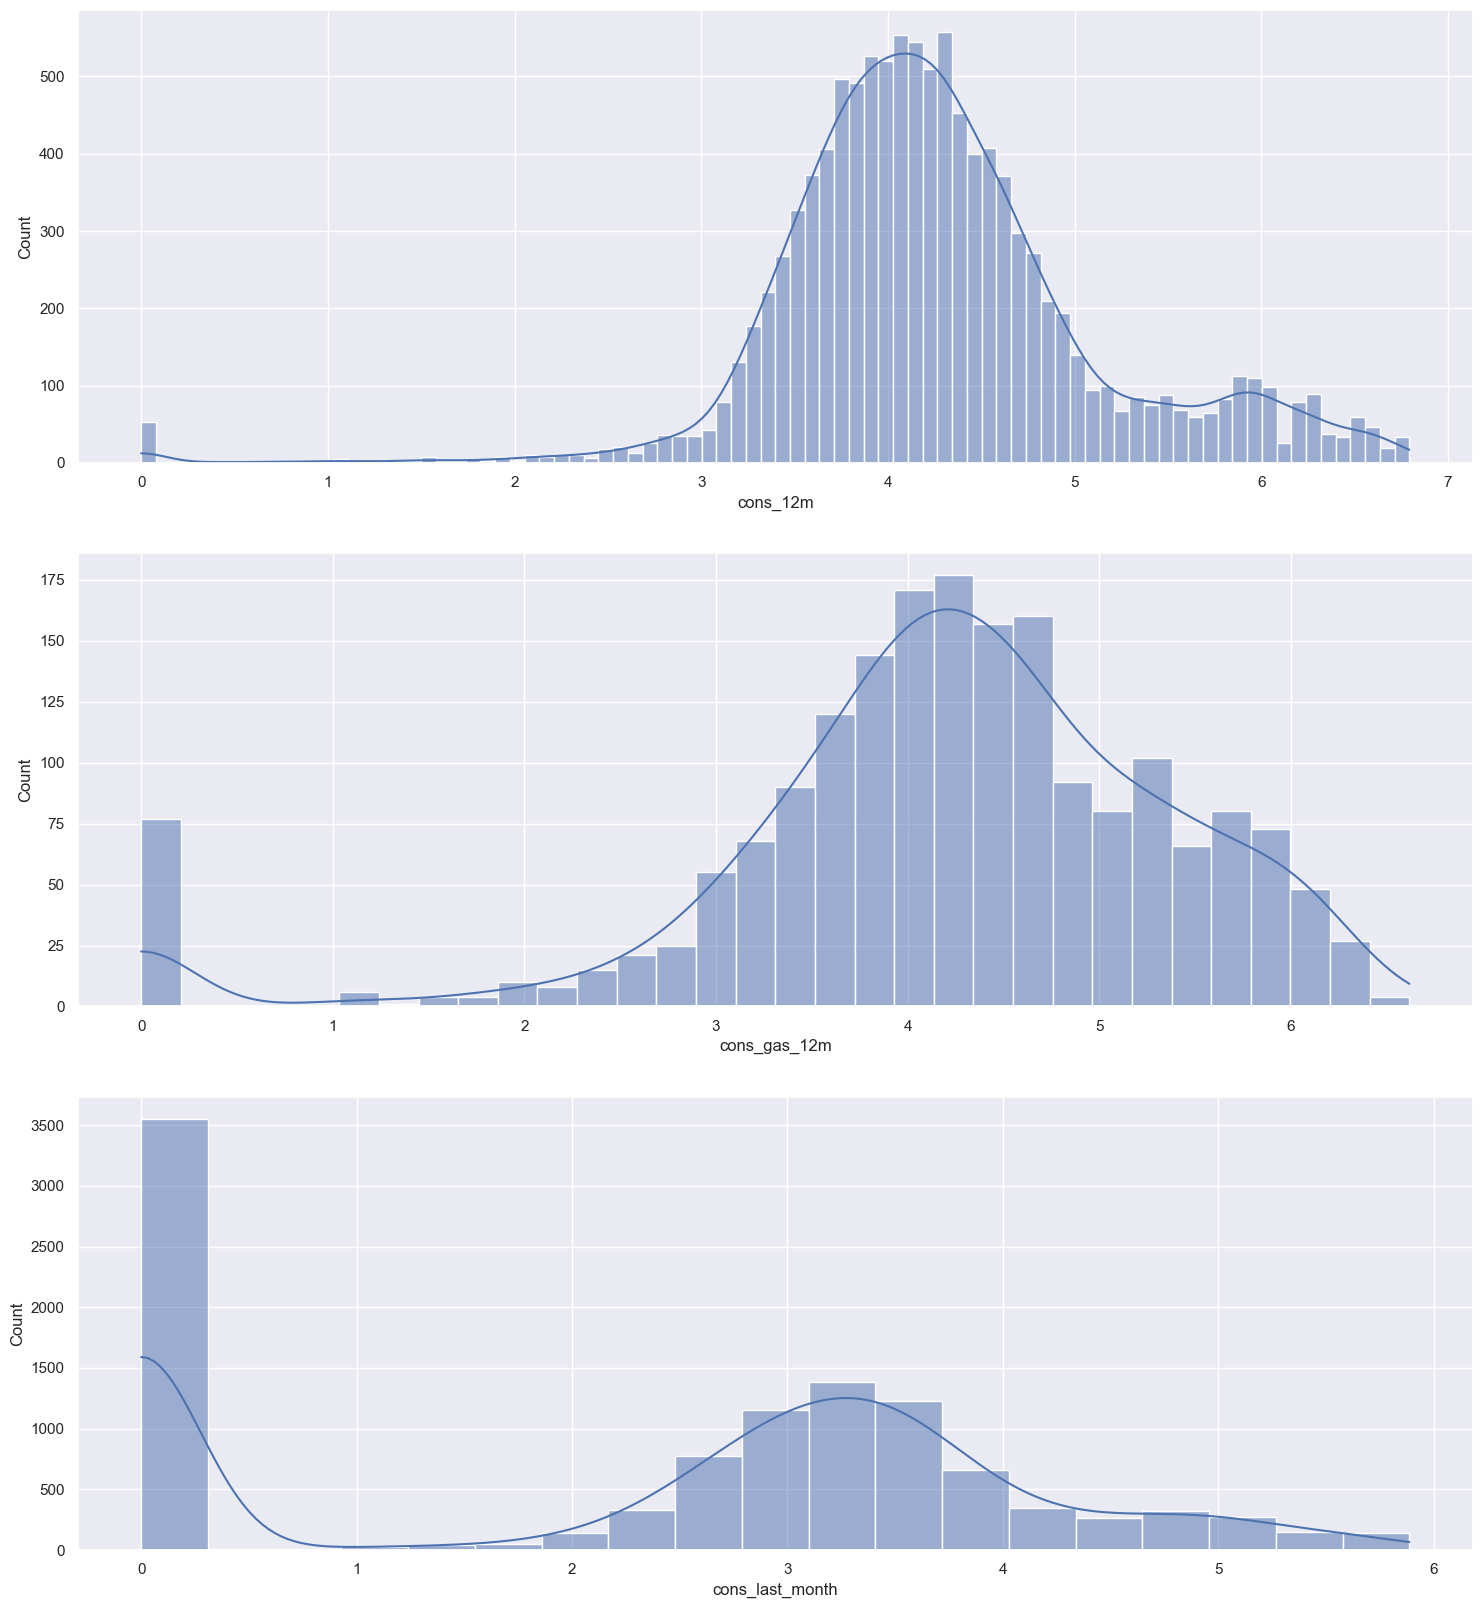

In [56]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot histograms
sns.histplot(df["cons_12m"].dropna(), ax=axs[0], kde=True)
sns.histplot(df[df["has_gas"] == 1]["cons_gas_12m"].dropna(), ax=axs[1], kde=True)
sns.histplot(df["cons_last_month"].dropna(), ax=axs[2], kde=True)

plt.show()

### Correlation 

**Key Points:**

- Feature engineering is iterative and aims to enhance a predictive model.

- Correlation analysis helps us understand feature relationships.

- Features should correlate with the target variable (`churn`) for predictive value.

- High feature correlation may imply redundancy, but perfect independence is rare.

- Real datasets often have some feature correlation.

- We'll examine feature correlations in our dataset.

In [57]:
df = df.apply(pd.to_numeric, errors='coerce') 


In [58]:
correlation = df.corr()

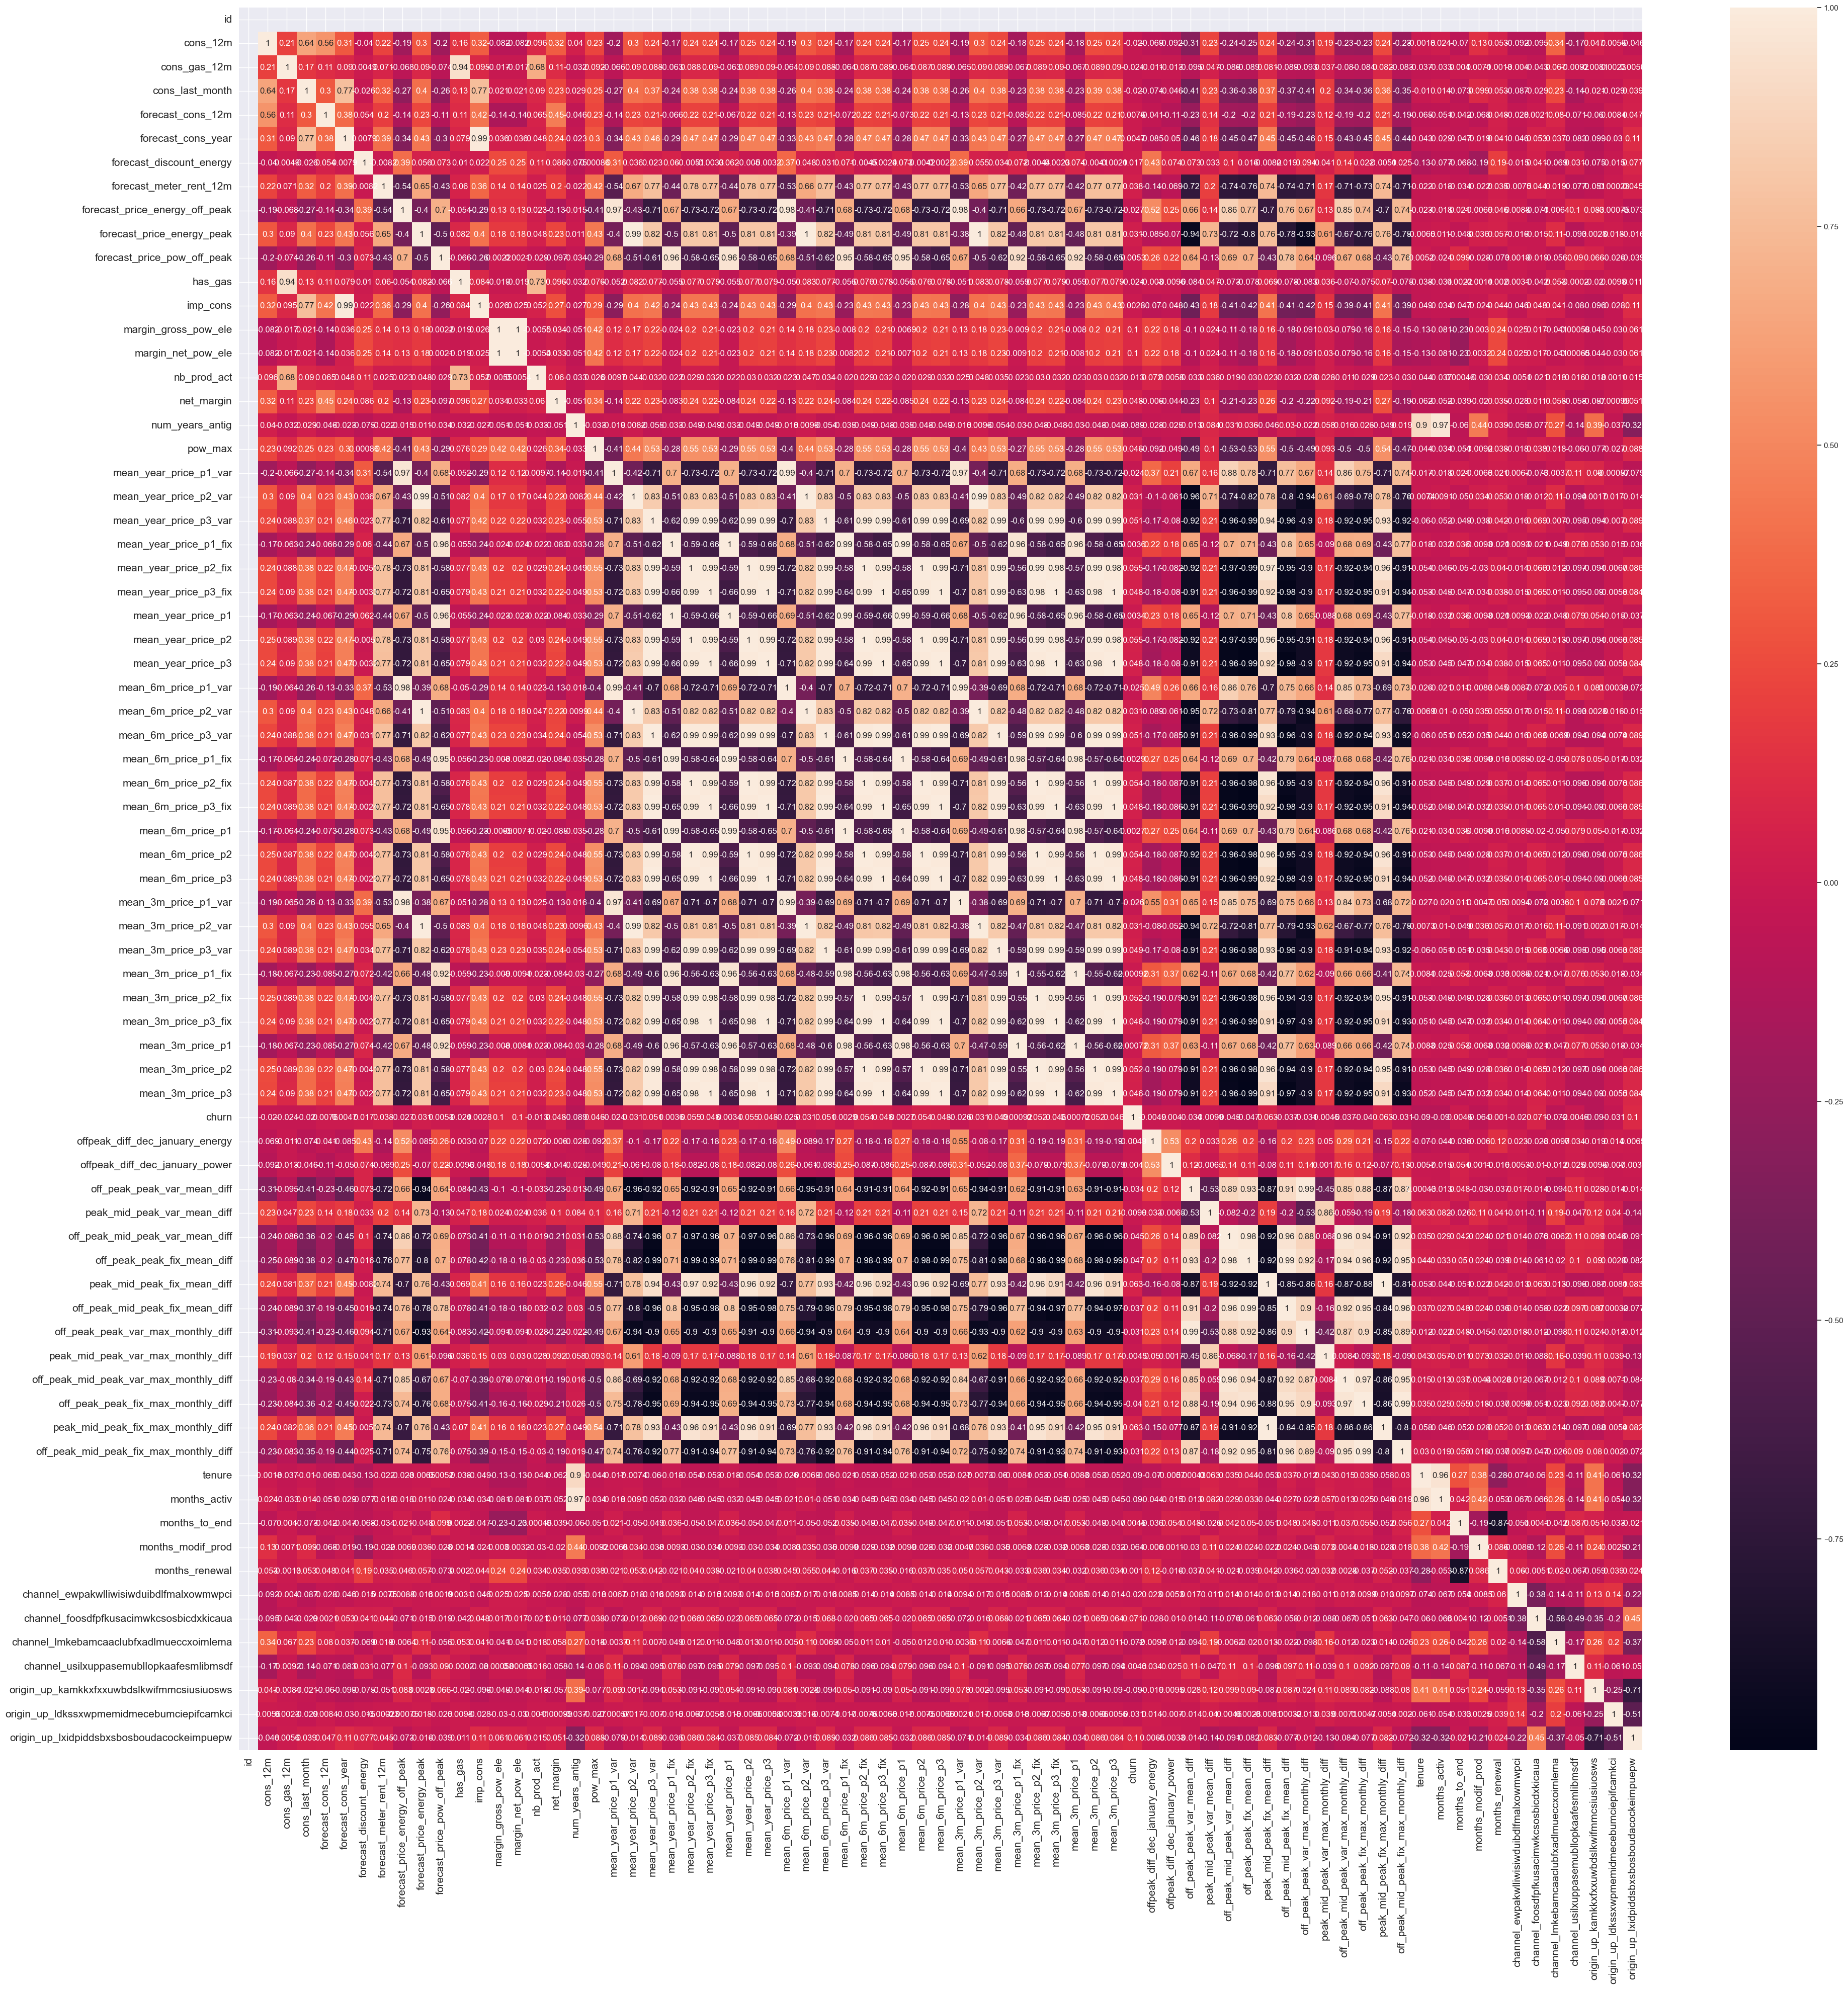

In [59]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [60]:
columns_to_drop = ['mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3', 'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_price_p3', 'mean_3m_price_p1', 'mean_3m_price_p2', 'mean_3m_price_p3']
df.drop(columns=columns_to_drop, inplace=True)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10830 entries, 0 to 10829
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          0 non-null      float64
 1   cons_12m                                    10830 non-null  float64
 2   cons_gas_12m                                10830 non-null  float64
 3   cons_last_month                             10830 non-null  float64
 4   forecast_cons_12m                           10830 non-null  float64
 5   forecast_cons_year                          10830 non-null  float64
 6   forecast_discount_energy                    10830 non-null  float64
 7   forecast_meter_rent_12m                     10830 non-null  float64
 8   forecast_price_energy_off_peak              10830 non-null  float64
 9   forecast_price_energy_peak                  10830 non-null  float64
 10  forecast_p

In [62]:
correlation = df.corr()

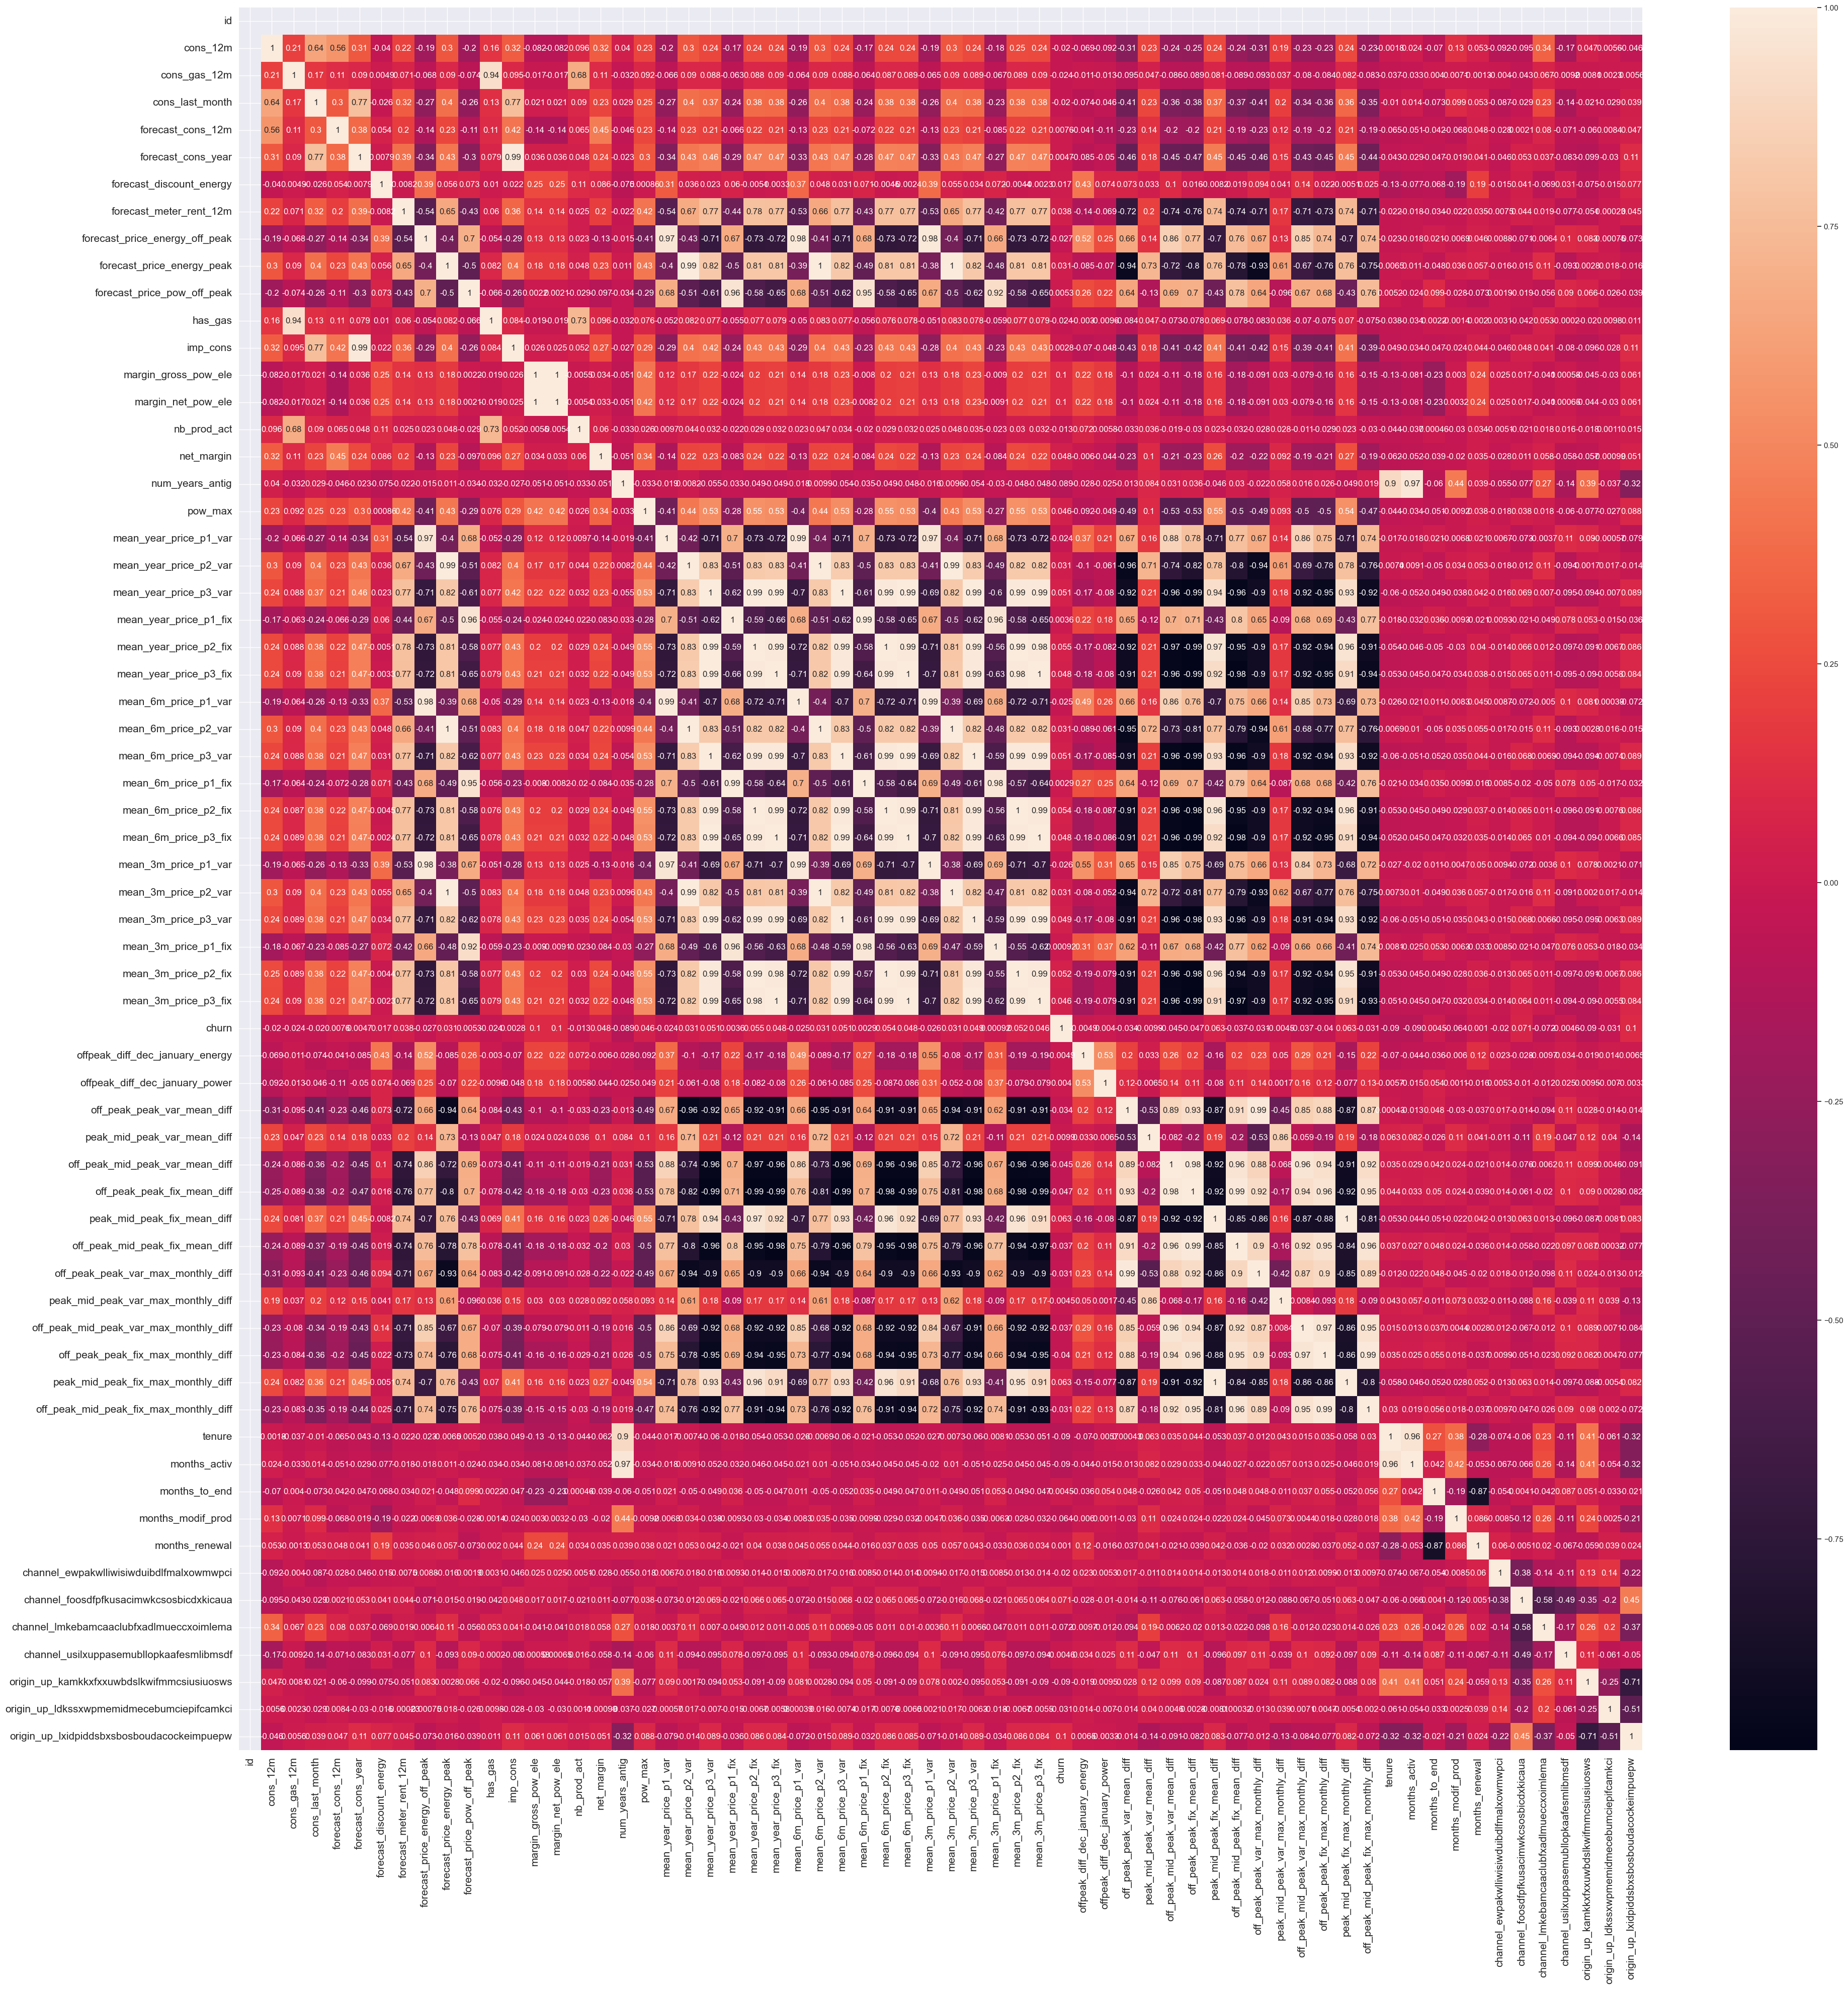

In [63]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [64]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now, display the correlation matrix
correlation_matrix = df.corr()
display(correlation_matrix)


id  cons_12m  cons_gas_12m  \
id                                         NaN       NaN           NaN   
cons_12m                                   NaN  1.000000      0.208056   
cons_gas_12m                               NaN  0.208056      1.000000   
cons_last_month                            NaN  0.637597      0.167099   
forecast_cons_12m                          NaN  0.560381      0.114869   
forecast_cons_year                         NaN  0.305645      0.089734   
forecast_discount_energy                   NaN -0.040412      0.004918   
forecast_meter_rent_12m                    NaN  0.218569      0.070899   
forecast_price_energy_off_peak             NaN -0.194970     -0.068117   
forecast_price_energy_peak                 NaN  0.299266      0.089695   
forecast_price_pow_off_peak                NaN -0.198465     -0.073617   
has_gas                                    NaN  0.157625      0.936642   
imp_cons                                   NaN  0.316897      0.095477   
margin_gross_pow_ele                       NaN -0.082099     -0.017257   
margin_net_pow_ele                         NaN -0.082055     -0.017279   
nb_prod_act                                NaN  0.096010      0.680402   
net_margin                                 NaN  0.319389      0.109158   
num_years_antig                            NaN  0.039649     -0.031562   
pow_max                                    NaN  0.229064      0.091933   
mean_year_price_p1_var                     NaN -0.197497     -0.065972   
mean_year_price_p2_var                     NaN  0.297674      0.089745   
mean_year_price_p3_var                     NaN  0.235236      0.088272   
mean_year_price_p1_fix                     NaN -0.169152     -0.062874   
mean_year_price_p2_fix                     NaN  0.244749      0.088468   
mean_year_price_p3_fix                     NaN  0.239935      0.089938   
mean_6m_price_p1_var                       NaN -0.194166     -0.064012   
mean_6m_price_p2_var                       NaN  0.298190      0.089955   
mean_6m_price_p3_var                       NaN  0.236403      0.087600   
mean_6m_price_p1_fix                       NaN -0.172721     -0.063679   
mean_6m_price_p2_fix                       NaN  0.244943      0.087292   
mean_6m_price_p3_fix                       NaN  0.240059      0.088810   
mean_3m_price_p1_var                       NaN -0.192240     -0.065010   
mean_3m_price_p2_var                       NaN  0.298859      0.090170   
mean_3m_price_p3_var                       NaN  0.240398      0.089481   
mean_3m_price_p1_fix                       NaN -0.177023     -0.066527   
mean_3m_price_p2_fix                       NaN  0.248440      0.088850   
mean_3m_price_p3_fix                       NaN  0.243398      0.090229   
churn                                      NaN -0.020351     -0.023863   
offpeak_diff_dec_january_energy            NaN -0.069082     -0.010695   
offpeak_diff_dec_january_power             NaN -0.092476     -0.012580   
off_peak_peak_var_mean_diff                NaN -0.308118     -0.094985   
peak_mid_peak_var_mean_diff                NaN  0.229332      0.047079   
off_peak_mid_peak_var_mean_diff            NaN -0.237974     -0.086185   
off_peak_peak_fix_mean_diff                NaN -0.246618     -0.089491   
peak_mid_peak_fix_mean_diff                NaN  0.240317      0.081020   
off_peak_mid_peak_fix_mean_diff            NaN -0.237865     -0.089014   
off_peak_peak_var_max_monthly_diff         NaN -0.306261     -0.093136   
peak_mid_peak_var_max_monthly_diff         NaN  0.193561      0.036804   
off_peak_mid_peak_var_max_monthly_diff     NaN -0.225558     -0.080449   
off_peak_peak_fix_max_monthly_diff         NaN -0.233610     -0.083611   
peak_mid_peak_fix_max_monthly_diff         NaN  0.241873      0.082329   
off_peak_mid_peak_fix_max_monthly_diff     NaN -0.227262     -0.083103   
tenure                                     NaN -0.001782     -0.037000   
months_activ                               NaN  

## 5. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [65]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [67]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn'] #target
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(10830, 62)
(10830,)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8122, 62)
(8122,)
(2708, 62)
(2708,)


In [69]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### Evaluation

In [70]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

This code is used to calculate various metrics related to a confusion matrix, which is often used in binary classification problems to evaluate the performance of a machine learning model. Here's an explanation of what's happening:

1. `predictions = model.predict(X_test)`: This line is making predictions on the test data (`X_test`) using a machine learning model (`model`). It's predicting the target variable based on the features in `X_test`. These predictions are stored in the `predictions` variable.

2. `tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()`: In this line, the confusion matrix is calculated using the `metrics.confusion_matrix` function from a library like scikit-learn. The confusion matrix is a 2x2 table that summarizes the model's performance on a binary classification task. The four elements of the matrix are typically:
   - True Negatives (tn): The number of instances that are actually negative (0) and are correctly predicted as negative.
   - False Positives (fp): The number of instances that are actually negative but are incorrectly predicted as positive (1).
   - False Negatives (fn): The number of instances that are actually positive (1) but are incorrectly predicted as negative.
   - True Positives (tp): The number of instances that are actually positive and are correctly predicted as positive.

   The `.ravel()` method is used to unpack these four values into individual variables, making them more accessible for further calculations.

After running this code, you will have the True Negatives (tn), False Positives (fp), False Negatives (fn), and True Positives (tp), which can be used to calculate various evaluation metrics like accuracy, precision, recall, and F1-score for the machine learning model's performance on the test data.

In [71]:
y_test.value_counts()

churn
0    2434
1     274
Name: count, dtype: int64

In [72]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 16
False positives: 2
True negatives: 2432
False negatives: 258

Accuracy: 0.9039881831610044
Precision: 0.8888888888888888
Recall: 0.058394160583941604


In the test set, we have around 10% of customers labeled as churners (churn = 1). Here's a breakdown of how the model performed:

- True Negatives (TN): We correctly identified 3282 out of 3286 non-churners (churn = 0), which is excellent.

- False Negatives (FN): We predicted 348 clients as non-churners (churn = 0) when they actually churned (churn = 1). This number is relatively high and needs improvement.

- False Positives (FP): We incorrectly predicted 4 clients as churners when they did not churn, which is quite good.

- True Positives (TP): Out of 366 clients who actually churned in the test dataset, we correctly identified only 18, which is a poor result.

- Accuracy: The accuracy score is high but not very informative due to the class imbalance, and it doesn't reveal the whole story.

- Precision: The precision score is 0.82, which is reasonable but has room for improvement.

- Recall: The recall score indicates the classifier's poor ability to identify positive samples, which is a significant concern.

The model excels in identifying non-churners but struggles to predict cases where clients do churn. A high percentage of clients who should be identified as churners are being classified as non-churners. This suggests that the current set of features may not be distinct enough to differentiate between churners and non-churners. A data scientist would typically revisit feature engineering and experiment with model parameter optimization to enhance performance.

### Features importance

In [73]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


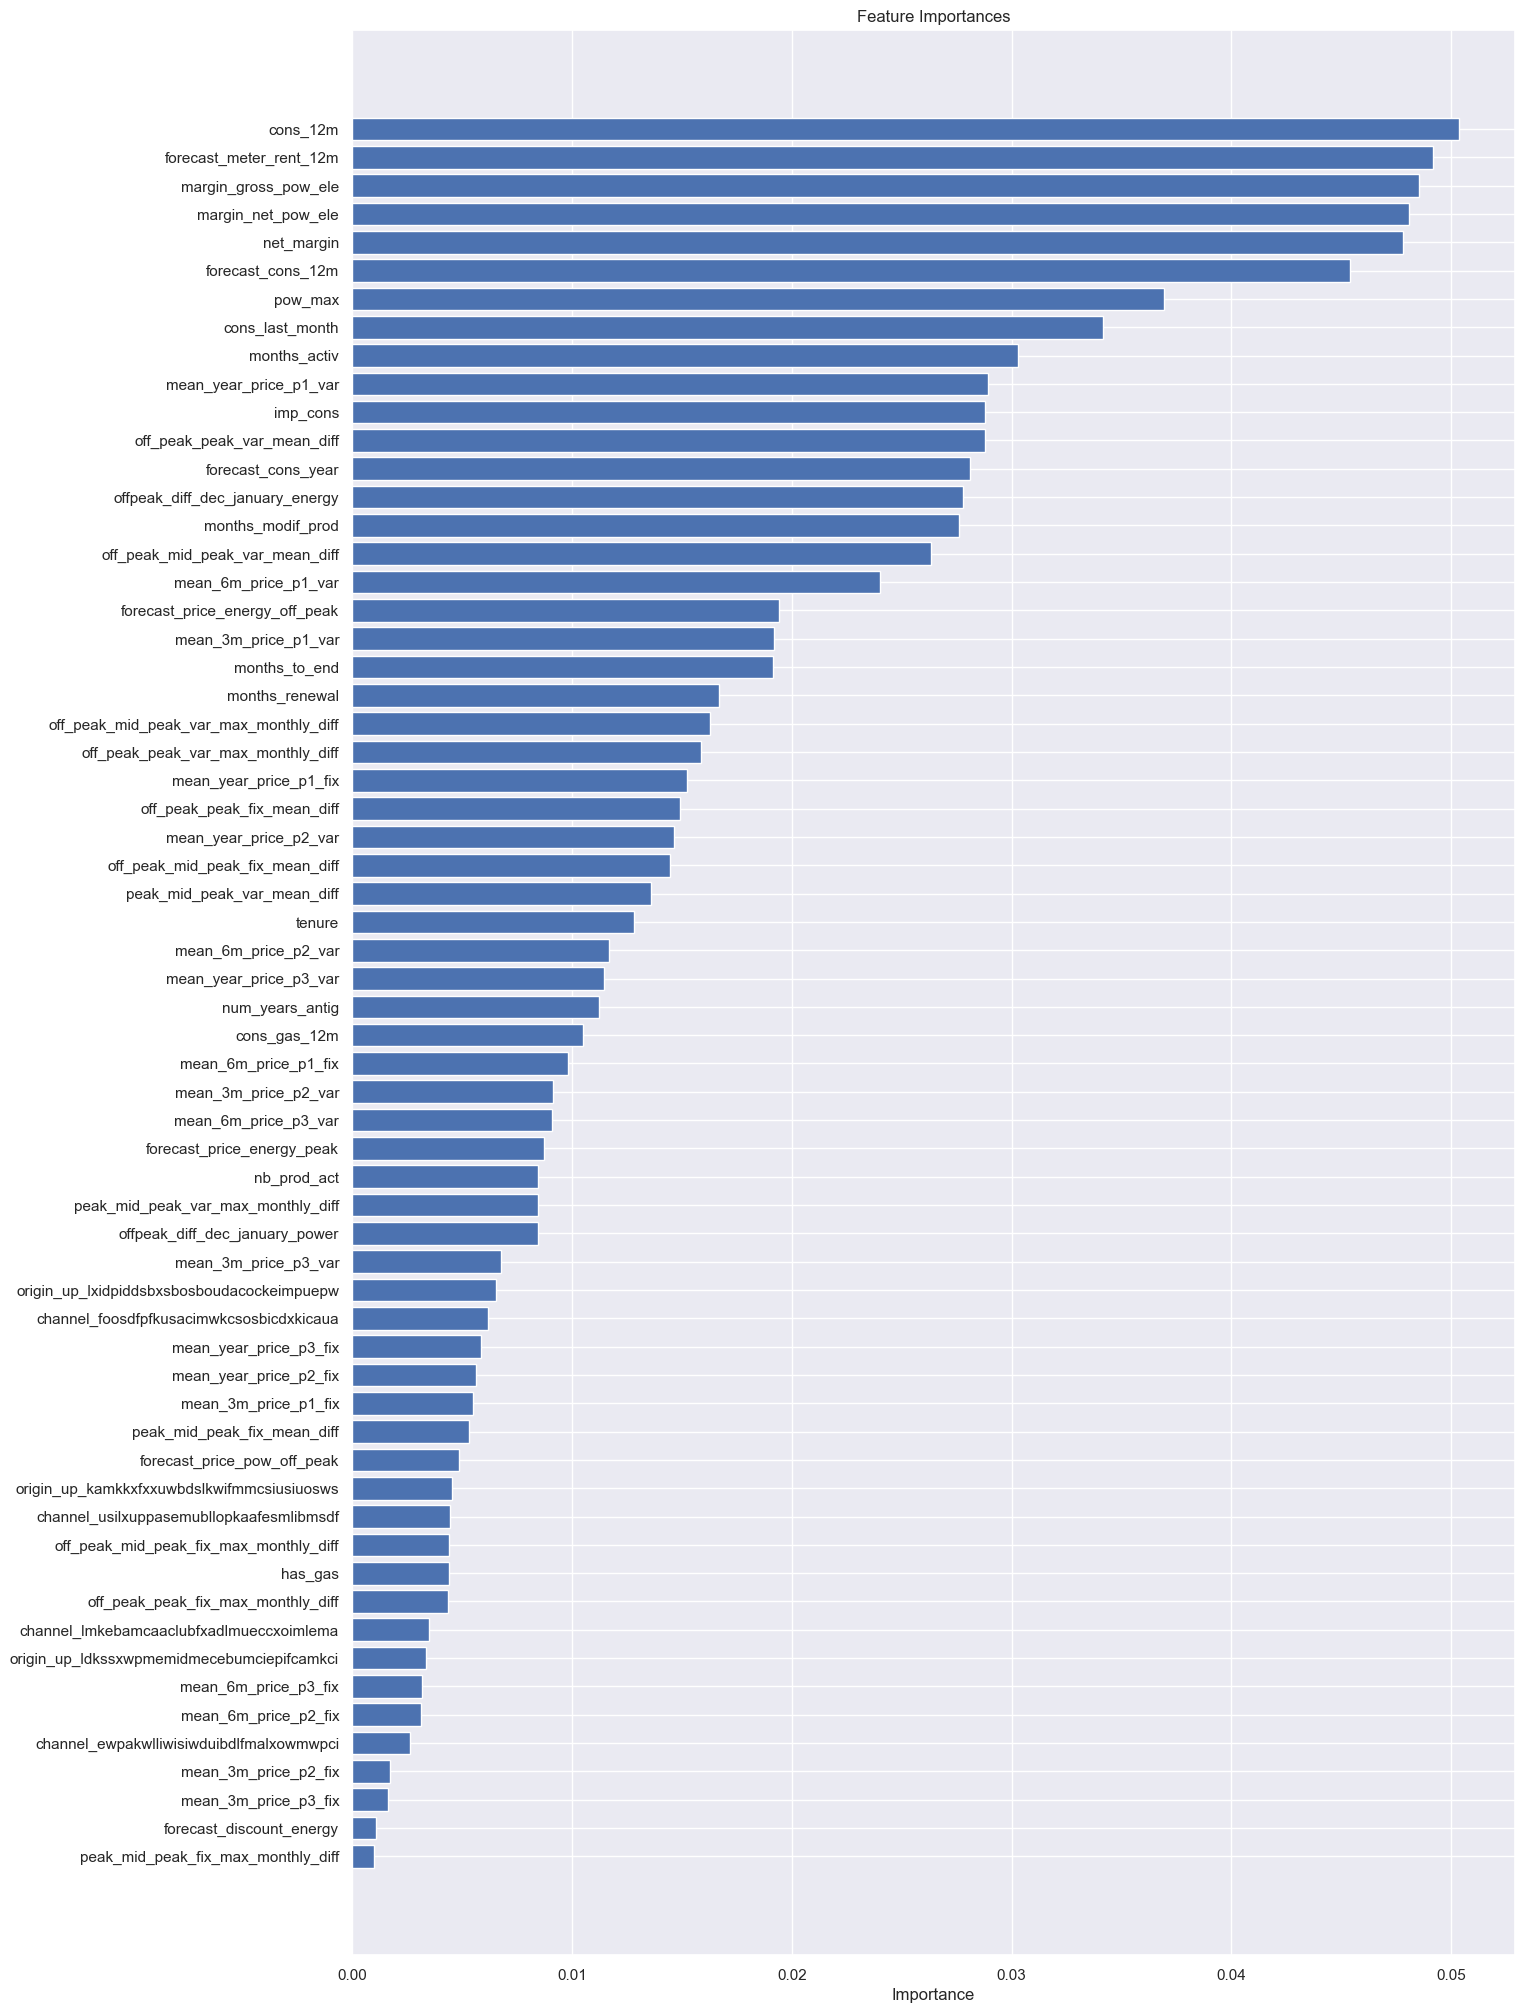

In [74]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

The insights from this chart are as follows:

- High net margin and 12-month consumption play a significant role in predicting churn.
- Margin on power subscription is another influential factor.
- Time-related factors, such as the duration of customer activity (tenure) and the time since their contract update, are crucial.
- Some features recommended by our colleague rank high, and certain derived features perform even better.
- Price sensitivity features, although scattered, are not the primary drivers of customer churn.

This observation is noteworthy as it relates to our initial hypothesis:

> Does customer churn correlate with price sensitivity?

According to the feature importances, price sensitivity is not a primary driver but has a modest impact. To reach a conclusive result, further experimentation is necessary.

In [75]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [76]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [77]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('C:/Users/Tasnim/Desktop/dataUsed2/out_of_sample_data_with_predictions.csv')